In [187]:
from catanatron_experimental.machine_learning.players.minimax import AlphaBetaPlayer
from catanatron_core.catanatron.players.weighted_random import WeightedRandomPlayer
# from fortomm import PlayerE
from fortomm import FooPlayer
from catanatron import Game, RandomPlayer, Color
from collections import Counter

In [188]:
players = [
    # AlphaBetaPlayer(Color.BLUE),
    WeightedRandomPlayer(Color.ORANGE),
    WeightedRandomPlayer(Color.RED),
    FooPlayer(Color.WHITE),
]

playerNames = {
    # Color.BLUE: "AlphaBeta",
    Color.ORANGE: "WeightedRandom 1",
    Color.RED: "WeightedRandom 2",
    Color.WHITE: "GP weights 3",
}

{<ActionType.BUILD_CITY: 'BUILD_CITY'>: 8730, <ActionType.BUILD_SETTLEMENT: 'BUILD_SETTLEMENT'>: 1661, <ActionType.BUY_DEVELOPMENT_CARD: 'BUY_DEVELOPMENT_CARD'>: 399, <ActionType.BUILD_ROAD: 'BUILD_ROAD'>: 6853}


In [189]:
NumberOfGames = 30

In [190]:
import time
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict, Counter
from copy import deepcopy

In [203]:



class Analysis:
    def __init__(self, playerNames={}):

        self.ActionsOfPlayers = defaultdict(list)
        self.GamesAndPlayers = {}
        self.game = 0
        self.playerNames = playerNames

    def set_game(self, game_number):
        self.game = game_number
        
    def end_game(self):
        for i in self.ActionsOfPlayers:
            self.GamesAndPlayers[self.game] = deepcopy(self.ActionsOfPlayers)

    def record_action(self, action_name, Player_id):

        self.ActionsOfPlayers[Player_id].append(action_name.action_type)


    def generate_plot(self):
        actions_count = {}
        for i in self.ActionsOfPlayers:
            actions_count[i] = Counter(self.ActionsOfPlayers[i])

        temp_count = sorted(list(actions_count.keys()), key=lambda x: str(x))
        if len(temp_count) == 4:
            fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10), sharey=True)
            fig.suptitle('Actions of Players')
            for i in range(4):
                ax = axs[i // 2][i % 2]
                x = []
                y = []
                for k, v in actions_count[temp_count[i]].items():
                    # if str(k)[11:] not in ['END_TURN', 'ROLL']:
                    if str(k)[11:] in ['BUILD_CITY', 'BUILD_ROAD', 'BUILD_SETTLEMENT', 'BUY_DEVELOPMENT_CARD']:
                        x.append(str(k)[11:])
                        y.append(int(v))
                
                print(x, y)
                ax.bar(x, y)

                ax.set_title('Player {}'.format(self.playerNames[temp_count[i]]))
                ax.set_xlabel('Actions')
                ax.set_ylabel('Count')
                ax.set_xticklabels(x, rotation = 80)
                
        elif len(temp_count) == 3:
            fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(10, 6), sharey=True)
            fig.suptitle('Actions of Players')

            for i in range(3):
                ax = axs[i]
                x = []
                y = []
                for k, v in actions_count[temp_count[i]].items():
                    if str(k)[11:] not in ['END_TURN', 'ROLL']:
                    # if str(k)[11:] in ['BUILD_CITY', 'BUILD_ROAD', 'BUILD_SETTLEMENT', 'BUY_DEVELOPMENT_CARD']:
                        
                        x.append(str(k)[11:])
                        y.append(int(v))
                
                print(x, y)
                ax.bar(x, y, color=['blue', 'red', 'green', 'orange'])

                ax.set_title('Player {}'.format(self.playerNames[temp_count[i]]))
                ax.set_xlabel('Actions')
                ax.set_ylabel('Count')
                ax.set_xticklabels(x, rotation = 80)  
        elif len(temp_count) == 2:
            fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), sharey=True)
            fig.suptitle('Actions of Players')

            for i in range(2):
                ax = axs[i]
                x = []
                y = []
                for k, v in sorted(actions_count[temp_count[i]].items(), key=lambda x: str(x[0])):
                    if str(k)[11:] not in ['END_TURN', 'ROLL']:
                    # if str(k)[11:] in ['BUILD_CITY', 'BUILD_ROAD', 'BUILD_SETTLEMENT', 'BUY_DEVELOPMENT_CARD']:
                        
                        x.append(str(k)[11:])
                        y.append(int(v))

                print(x, y)
                ax.bar(x, y, color=['blue', 'red', 'green', 'orange'])

                ax.set_title('Player {}'.format(self.playerNames[temp_count[i]]))
                ax.set_xlabel('Actions')
                ax.set_ylabel('Count')
                ax.set_xticklabels(x, rotation = 80)
        plt.tight_layout()
        plt.show()



                

In [204]:
A = Analysis(playerNames)

In [205]:
for i in players:
    i.analysis = A.record_action

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
['BUILD_SETTLEMENT', 'BUILD_ROAD', 'MARITIME_TRADE', 'MOVE_ROBBER', 'BUY_DEVELOPMENT_CARD', 'PLAY_KNIGHT_CARD', 'BUILD_CITY', 'DISCARD', 'PLAY_ROAD_BUILDING', 'PLAY_MONOPOLY', 'PLAY_YEAR_OF_PLENTY'] [105, 300, 705, 536, 194, 106, 22, 84, 13, 17, 11]
['BUILD_SETTLEMENT', 'BUILD_ROAD', 'BUY_DEVELOPMENT_CARD', 'PLAY_ROAD_BUILDING', 'MARITIME_TRADE', 'PLAY_KNIGHT_CARD', 'MOVE_ROBBER', 'DISCARD', 'BUILD_CITY', 'PLAY_MONOPOLY', 'PLAY_YEAR_OF_PLENTY'] [93, 286, 183, 16, 688, 100, 513, 59, 16, 16, 13]
['BUILD_SETTLEMENT', 'BUILD_ROAD', 'MARITIME_TRADE', 'BUY_DEVELOPMENT_CARD', 'MOVE_ROBBER', 'PLAY_KNIGHT_CARD', 'DISCARD', 'PLAY_MONOPOLY', 'PLAY_YEAR_OF_PLENTY', 'PLAY_ROAD_BUILDING', 'BUILD_CITY'] [72, 291, 673, 198, 524, 117, 73, 15, 17, 11, 16]


/var/folders/0x/45s0xqcj0w30vthlrf9wbtqh0000gn/T/ipykernel_30211/841922874.py:69: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x, rotation = 80)
/var/folders/0x/45s0xqcj0w30vthlrf9wbtqh0000gn/T/ipykernel_30211/841922874.py:69: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x, rotation = 80)
/var/folders/0x/45s0xqcj0w30vthlrf9wbtqh0000gn/T/ipykernel_30211/841922874.py:69: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x, rotation = 80)


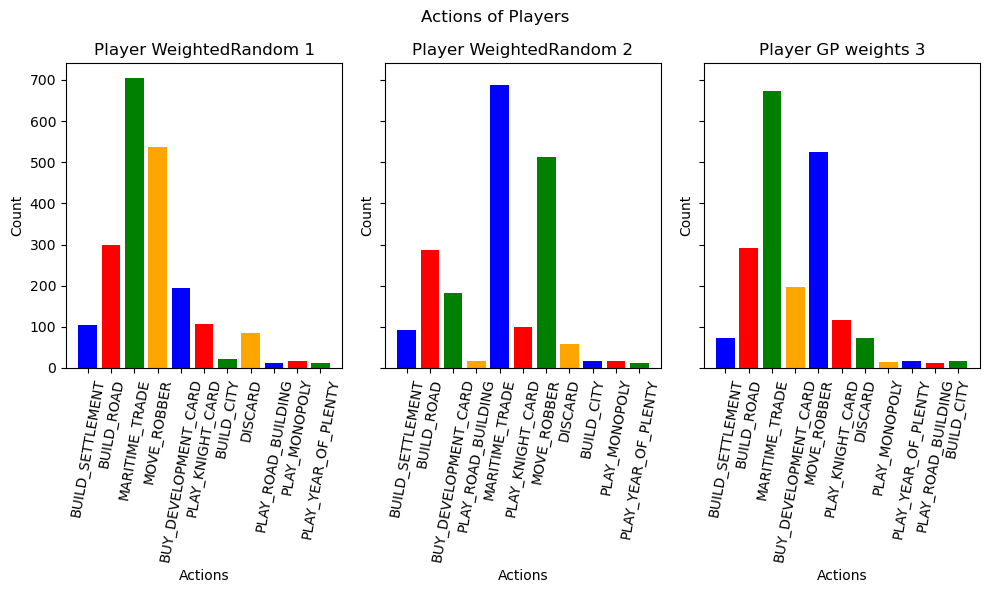

In [206]:
victory = []

# running the games for the current generation
for games in range(NumberOfGames):
    game = Game(players)
    val = game.play()
    victory.append(val)
    print(games)

c = dict(Counter(victory))
for key in c:
    c[key] = int(c[key] / NumberOfGames * 100)
A.generate_plot()

In [207]:
c

{<Color.RED: 'RED'>: 30,
 <Color.ORANGE: 'ORANGE'>: 50,
 <Color.WHITE: 'WHITE'>: 20}

['BUILD_SETTLEMENT', 'BUILD_ROAD', 'MARITIME_TRADE', 'MOVE_ROBBER', 'BUY_DEVELOPMENT_CARD', 'PLAY_KNIGHT_CARD', 'BUILD_CITY', 'DISCARD', 'PLAY_ROAD_BUILDING', 'PLAY_MONOPOLY', 'PLAY_YEAR_OF_PLENTY'] [105, 300, 705, 536, 194, 106, 22, 84, 13, 17, 11]
['BUILD_SETTLEMENT', 'BUILD_ROAD', 'BUY_DEVELOPMENT_CARD', 'PLAY_ROAD_BUILDING', 'MARITIME_TRADE', 'PLAY_KNIGHT_CARD', 'MOVE_ROBBER', 'DISCARD', 'BUILD_CITY', 'PLAY_MONOPOLY', 'PLAY_YEAR_OF_PLENTY'] [93, 286, 183, 16, 688, 100, 513, 59, 16, 16, 13]
['BUILD_SETTLEMENT', 'BUILD_ROAD', 'MARITIME_TRADE', 'BUY_DEVELOPMENT_CARD', 'MOVE_ROBBER', 'PLAY_KNIGHT_CARD', 'DISCARD', 'PLAY_MONOPOLY', 'PLAY_YEAR_OF_PLENTY', 'PLAY_ROAD_BUILDING', 'BUILD_CITY'] [72, 291, 673, 198, 524, 117, 73, 15, 17, 11, 16]


/var/folders/0x/45s0xqcj0w30vthlrf9wbtqh0000gn/T/ipykernel_30211/841922874.py:69: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x, rotation = 80)
/var/folders/0x/45s0xqcj0w30vthlrf9wbtqh0000gn/T/ipykernel_30211/841922874.py:69: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x, rotation = 80)
/var/folders/0x/45s0xqcj0w30vthlrf9wbtqh0000gn/T/ipykernel_30211/841922874.py:69: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x, rotation = 80)


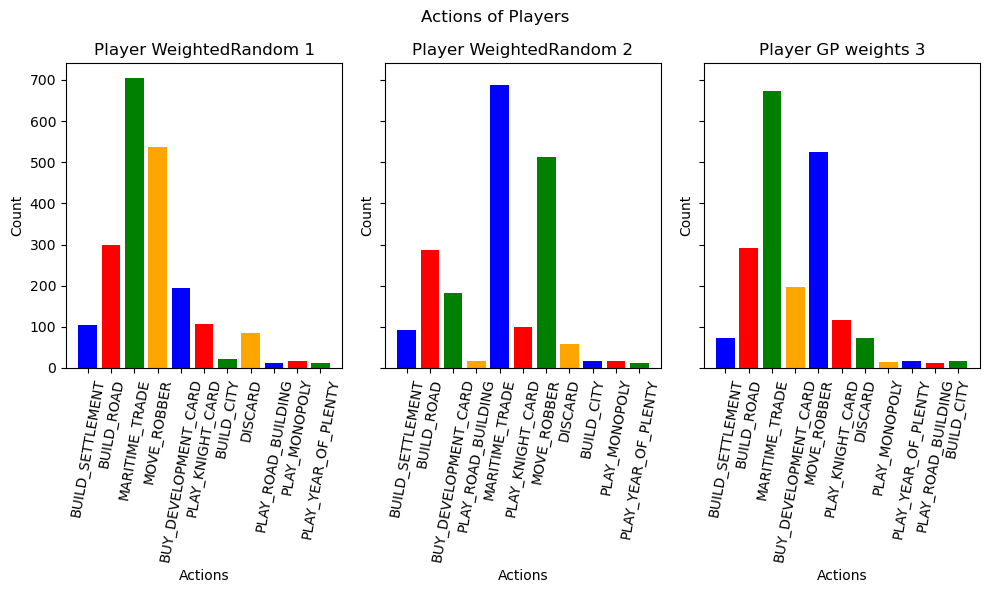

In [208]:
A.generate_plot()